In [3]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')

figure_width = 12
figure_height = 8

plt.rcParams["figure.figsize"] = (figure_width,figure_height)
import numpy as np 

def load(directory,name,runs):
    run = 0
    values = np.load(directory+name+"-CIFAR-10-"+str(run)+".npy")
    for run in range(run+1,runs):
        value = np.load(directory+name+"-CIFAR-10-"+str(run)+".npy")
        values = np.vstack((values,value))
    
    means = np.mean(values,axis=0)
    stds = np.std(values,axis=0)
    
    return means,stds  

directory = "../separation-values/"

ResNet18mean,ResNet18std = load(directory,"ResNet18",5)
ResNet34mean,ResNet34std = load(directory,"ResNet34",5)
ResNet50mean,ResNet50std = load(directory,"ResNet50",5)
BranchedResNet18mean,BranchedResNet18std = load(directory,"BranchedResNet18",5)
BranchedResNet34mean,BranchedResNet34std = load(directory,"BranchedResNet34",5)
BranchedResNet50mean,BranchedResNet50std = load(directory,"BranchedResNet50",5)

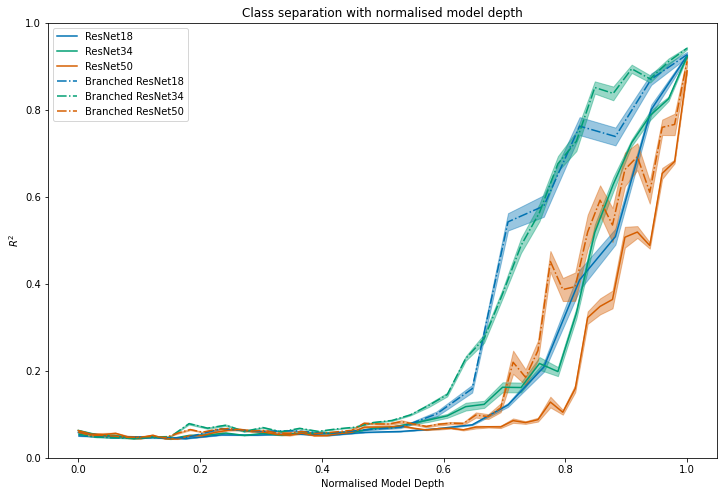

In [4]:
def get_values(values):
    return(np.linspace(0,1,values.shape[0]))

def plot(separation,errors,name,color,branched=False):

    layers = get_values(separation)
    if branched == True:
        plt.plot(layers,separation,'-.', label = name, color = color)
        plt.fill_between(layers, separation-errors, separation+errors,alpha=0.4, color = color)
    if branched == False:
        plt.plot(layers,separation, label = name, color = color)
        plt.fill_between(layers, separation-errors, separation+errors,alpha=0.4, color = color)

plot(ResNet18mean,ResNet18std,'ResNet18','C0')
plot(ResNet34mean,ResNet34std,'ResNet34','C1')
plot(ResNet50mean,ResNet50std,'ResNet50','C2')
plot(BranchedResNet18mean, BranchedResNet18std,'Branched ResNet18','C0',branched=True)
plot(BranchedResNet34mean, BranchedResNet34std,'Branched ResNet34','C1',branched=True)
plot(BranchedResNet50mean, BranchedResNet50std,'Branched ResNet50','C2',branched=True)
# plot(GoogLeNet,"GoogLeNet")
# plot(PNASnet,"PNAS-Net")


plt.title('Class separation with normalised model depth')
plt.ylim(0,1)
plt.xlabel("Normalised Model Depth")
plt.ylabel("$R^2$")
plt.legend(loc=2)
plt.savefig('../results/CIFAR10/Class-Separation/resnets-normalised.pdf', bbox_inches = 'tight')
plt.show()

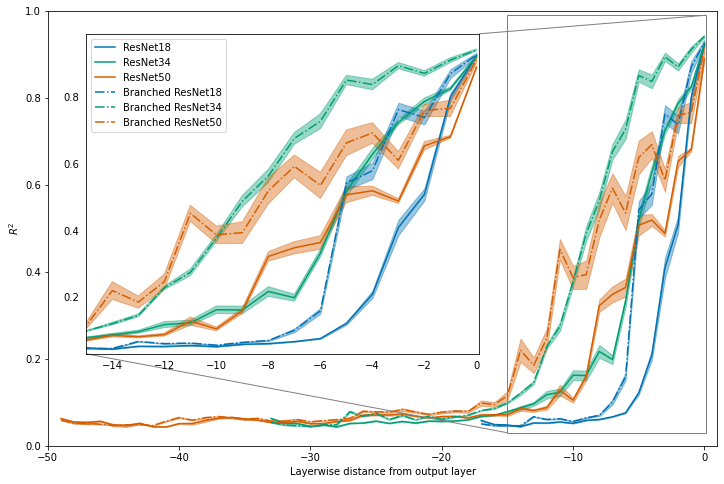

In [5]:
# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

def get_values(values):
    return(np.arange(-values.shape[0]+1,1))
        


fig, ax = plt.subplots()

plot(ResNet18mean,ResNet18std,'ResNet18','C0')
plot(ResNet34mean,ResNet34std,'ResNet34','C1')
plot(ResNet50mean,ResNet50std,'ResNet50','C2')
plot(BranchedResNet18mean, BranchedResNet18std,'Branched ResNet18','C0',branched=True)
plot(BranchedResNet34mean, BranchedResNet34std,'Branched ResNet34','C1',branched=True)
plot(BranchedResNet50mean, BranchedResNet50std,'Branched ResNet50','C2',branched=True)
plt.ylim(0.0,1.0)
plt.xlim(-50,1)
plt.xlabel('Layerwise distance from output layer')
plt.ylabel('$R^2$')



axins = inset_axes(ax, width=figure_width/2.2, height=figure_height/1.8, bbox_to_anchor=(0.05,0.2), loc=3, bbox_transform=ax.transAxes)

plot(ResNet18mean,ResNet18std,'ResNet18','C0')
plot(ResNet34mean,ResNet34std,'ResNet34','C1')
plot(ResNet50mean,ResNet50std,'ResNet50','C2')
plot(BranchedResNet18mean, BranchedResNet18std,'Branched ResNet18','C0',branched=True)
plot(BranchedResNet34mean, BranchedResNet34std,'Branched ResNet34','C1',branched=True)
plot(BranchedResNet50mean, BranchedResNet50std,'Branched ResNet50','C2',branched=True)

# sub region of the original image
x1, x2, y1, y2 = -15, 0.1, 0.03, 0.99 
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.tick_params(axis = "x", which = "both", bottom = False, top = False)
axins.tick_params(axis = "y", which = "both", left = False, right = False)


# plt.xticks(visible=False)
# plt.yticks(visible=False)

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
axins.legend()
plt.savefig('../results/CIFAR10/Class-Separation/branched-resnets-layer-wise.pdf', bbox_inches = 'tight')
plt.draw()
plt.show()

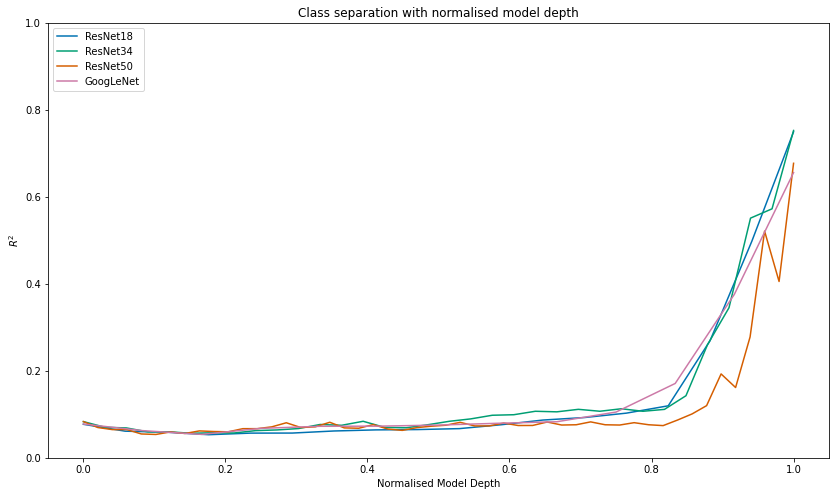

In [9]:
plot(ResNet18,'ResNet18')
plot(ResNet34,'ResNet34')
plot(ResNet50,'ResNet50')
plot(GoogLeNet,"GoogLeNet")
# plot(PNASnet,"PNAS-Net")


plt.title('Class separation with normalised model depth')
plt.ylim(0,1)
plt.xlabel("Normalised Model Depth")
plt.ylabel("$R^2$")
plt.legend(loc=2)
plt.savefig('../results/CIFAR10/Class-Separation/all-models-normalised.pdf', bbox_inches = 'tight')
plt.show()

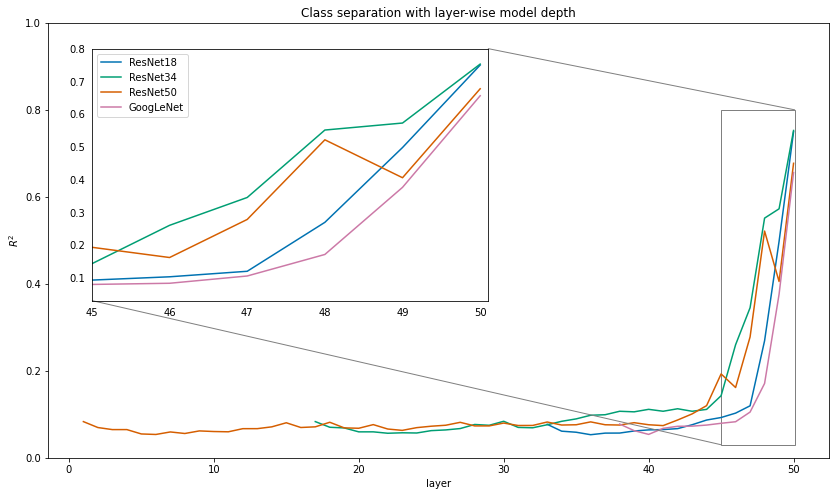

In [10]:
# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax = plt.subplots()

plt.title('Class separation with layer-wise model depth')
ax.plot(np.arange(51-ResNet18.shape[0],51,),ResNet18,label='ResNet18',color='C0')
ax.plot(np.arange(51-ResNet34.shape[0],51,),ResNet34,label='ResNet34',color='C1')
ax.plot(np.arange(51-ResNet50.shape[0],51,),ResNet50,label='ResNet50',color='C2')
ax.plot(np.arange(51-GoogLeNet.shape[0],51,),GoogLeNet,label='GoogLeNet',color='C3')
plt.ylim(0.0,1.0)
plt.xlabel('layer')
plt.ylabel('$R^2$')



axins = inset_axes(ax, width=5.5, height=3.5, bbox_to_anchor=(0.05,0.35), loc=3, bbox_transform=ax.transAxes)
axins.plot(np.arange(51-ResNet18.shape[0],51,),ResNet18,label='ResNet18',color='C0')
axins.plot(np.arange(51-ResNet34.shape[0],51,),ResNet34,label='ResNet34',color='C1')
axins.plot(np.arange(51-ResNet50.shape[0],51,),ResNet50,label='ResNet50',color='C2')
axins.plot(np.arange(51-GoogLeNet.shape[0],51,),GoogLeNet,label='GoogLeNet',color='C3')

# sub region of the original image
x1, x2, y1, y2 = 45, 50.1, 0.03, 0.8 
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.tick_params(axis = "x", which = "both", bottom = False, top = False)
axins.tick_params(axis = "y", which = "both", left = False, right = False)


# plt.xticks(visible=False)
# plt.yticks(visible=False)

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
axins.legend()
plt.savefig('../results/CIFAR10/Class-Separation/all-models-layer-wise.pdf', bbox_inches = 'tight')
plt.draw()
plt.show()